In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data  = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
data.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df = data.reset_index()
df = df.drop("index", axis="columns")
df = df.drop("Id", axis="columns")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df_new = pd.get_dummies(df)
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [9]:
df_kmeans = pd.get_dummies(df, drop_first=True)
df_kmeans.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


<Axes: >

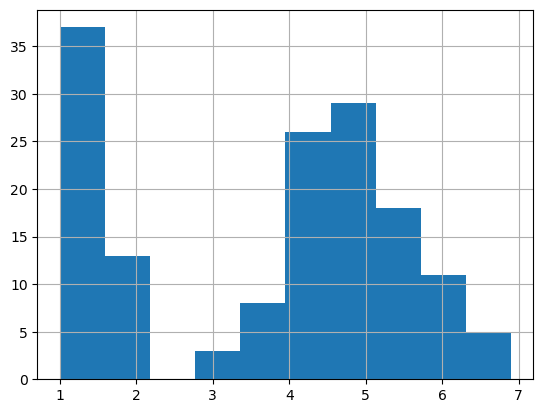

In [10]:
df["PetalLengthCm"].hist()

<Axes: >

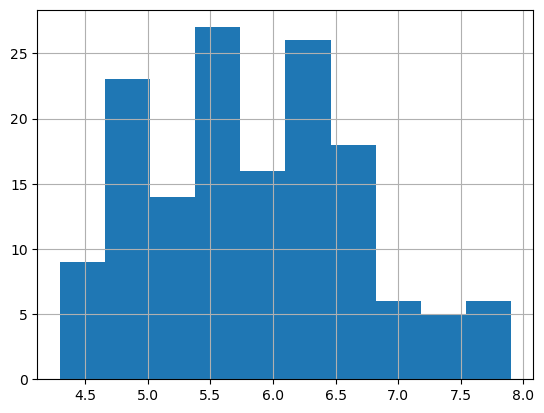

In [11]:
df["SepalLengthCm"].hist()

<Axes: >

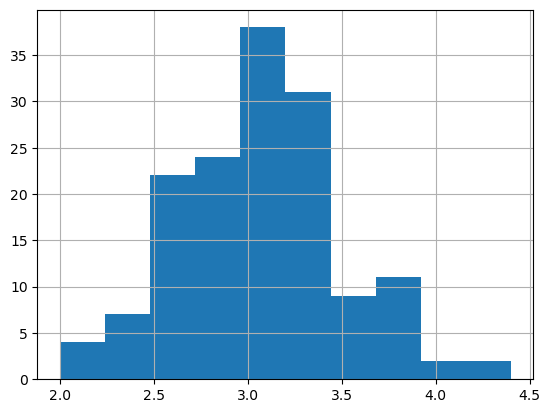

In [12]:
df["SepalWidthCm"].hist()

<Axes: >

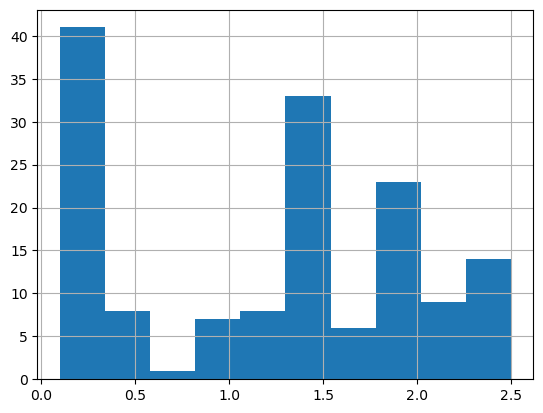

In [13]:
df["PetalWidthCm"].hist()

In [14]:
#color list of colour and class label

colors = ["red","orange","blue"]
speices = ["Iris-virginica",'Iris-versicolor',"Iris-setosa"]


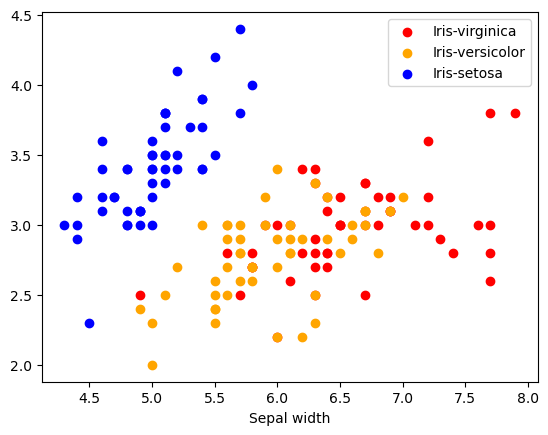

In [15]:
import matplotlib.pyplot as plt

for i in range(3):
    x =df[df['Species'] == speices[i]]
    plt.scatter(x["SepalLengthCm"], x['SepalWidthCm'], c = colors[i], label = speices[i])
plt.xlabel('Sepal length')
plt.xlabel('Sepal width')
plt.legend()

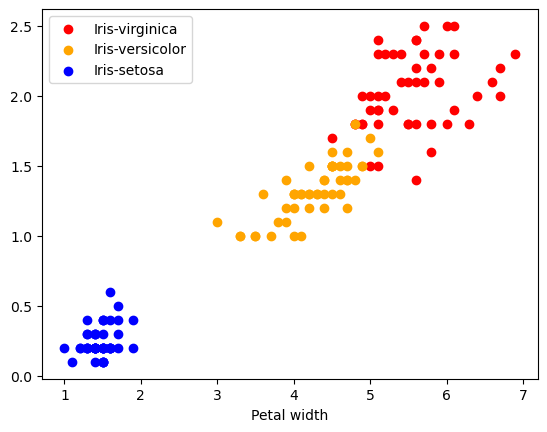

In [16]:
import matplotlib.pyplot as plt

for i in range(3):
    x =df[df['Species'] == speices[i]]
    plt.scatter(x["PetalLengthCm"], x['PetalWidthCm'], c = colors[i], label = speices[i])
plt.xlabel('Petal length')
plt.xlabel('Petal width')
plt.legend()

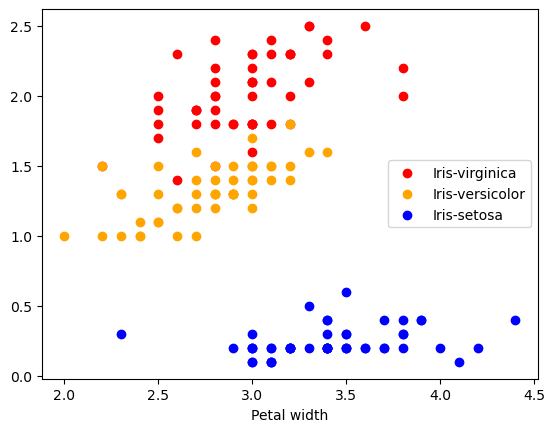

In [17]:
import matplotlib.pyplot as plt

for i in range(3):
    x =df[df['Species'] == speices[i]]
    plt.scatter(x["SepalWidthCm"], x['PetalWidthCm'], c = colors[i], label = speices[i])
plt.xlabel('Petal length')
plt.xlabel('Petal width')
plt.legend()

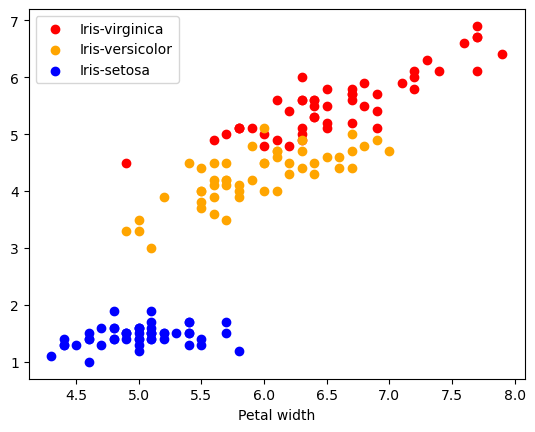

In [18]:
import matplotlib.pyplot as plt

for i in range(3):
    x =df[df['Species'] == speices[i]]
    plt.scatter(x["SepalLengthCm"], x['PetalLengthCm'], c = colors[i], label = speices[i])
plt.xlabel('Petal length')
plt.xlabel('Petal width')
plt.legend()

In [19]:
df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

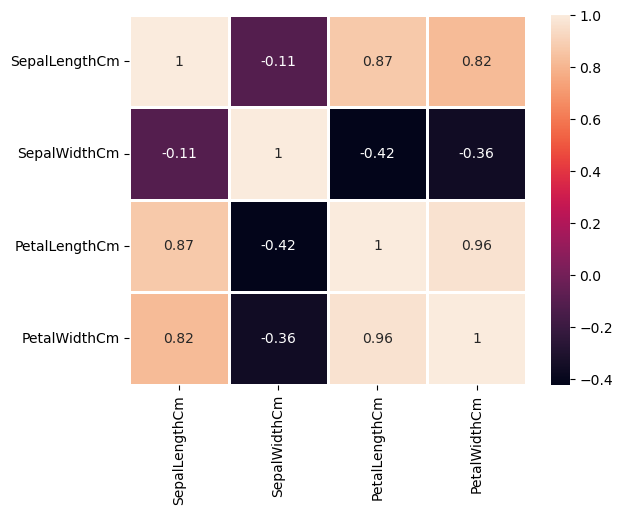

In [20]:
import seaborn as sns  
sns.heatmap(df.corr(),annot=True,linewidth = 2)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
x = df.drop("Species", axis="columns")
y = df['Species']
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.30)

In [22]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
print("Log_regression_accuracy:", round(model.score(x_test, y_test)*100,2) )

Log_regression_accuracy: 95.56


In [23]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [24]:
print("Log_regression_accuracy:",model.score(x_test, y_test)*100)

Log_regression_accuracy: 95.55555555555556


In [25]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier()
model.fit(x_train,y_train)
print("K.N_regression_accuracy:",round(model.score(x_test, y_test)*100,2))

K.N_regression_accuracy: 93.33


In [26]:
from sklearn.tree import DecisionTreeClassifier 
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
print("D_tree_regression_accuracy:",round(model.score(x_test, y_test)*100,2))

D_tree_regression_accuracy: 88.89


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [28]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("SepalLengthCm"), "Cluster", clusters)
df_kmeans.head(30)

,Cluster,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,0
1,1,4.9,3.0,1.4,0.2,0,0
2,1,4.7,3.2,1.3,0.2,0,0
3,1,4.6,3.1,1.5,0.2,0,0
4,1,5.0,3.6,1.4,0.2,0,0
5,1,5.4,3.9,1.7,0.4,0,0
6,1,4.6,3.4,1.4,0.3,0,0
7,1,5.0,3.4,1.5,0.2,0,0
8,1,4.4,2.9,1.4,0.2,0,0
9,1,4.9,3.1,1.5,0.1,0,0


In [29]:
df_kmeans.Cluster.unique() 

array([1, 2, 0])

In [30]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
from matplotlib import pyplot as plt

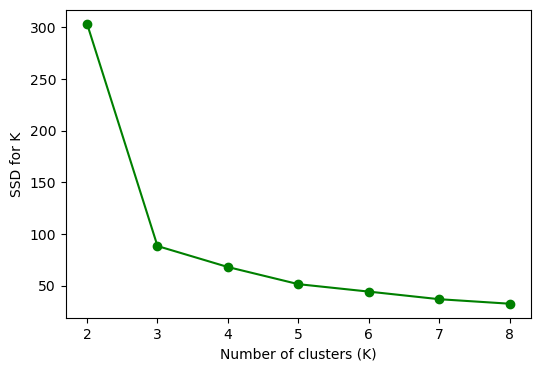

In [32]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [33]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters_1 = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("SepalLengthCm"), "Cluster_1", clusters)
df_kmeans.head(30)
#sklearn.metric.silhouette_score(df_kmeans,clusters)

,Cluster,Cluster_1,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,1,5.1,3.5,1.4,0.2,0,0
1,1,1,4.9,3.0,1.4,0.2,0,0
2,1,1,4.7,3.2,1.3,0.2,0,0
3,1,1,4.6,3.1,1.5,0.2,0,0
4,1,1,5.0,3.6,1.4,0.2,0,0
5,1,1,5.4,3.9,1.7,0.4,0,0
6,1,1,4.6,3.4,1.4,0.3,0,0
7,1,1,5.0,3.4,1.5,0.2,0,0
8,1,1,4.4,2.9,1.4,0.2,0,0
9,1,1,4.9,3.1,1.5,0.1,0,0


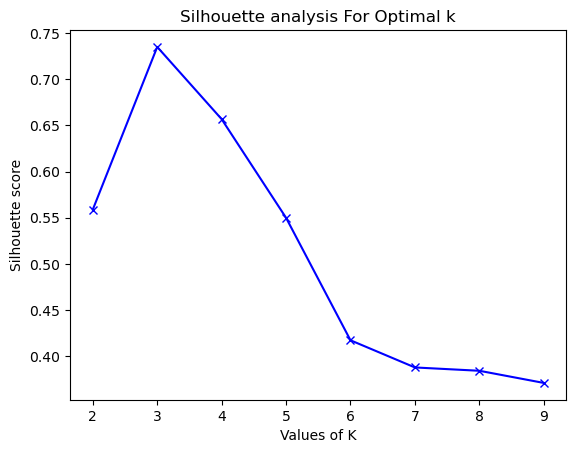

In [34]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_kmeans)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(df_kmeans, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [35]:
print("The Silhouette Scores for different K values are as follows:")
for k in range(2,10):
  print(k,silhouette_avg[k-2])

The Silhouette Scores for different K values are as follows:
2 0.5589600503396908
3 0.7349673119817618
4 0.6567526373929577
5 0.5499828093780506
6 0.41739448628689674
7 0.38798400147433443
8 0.3843834545200834
9 0.3712325827445373
